## Import all required libraries

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import *

%matplotlib inline

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


SSP2 objective value: 3510659.25
stor scenario: SSP2


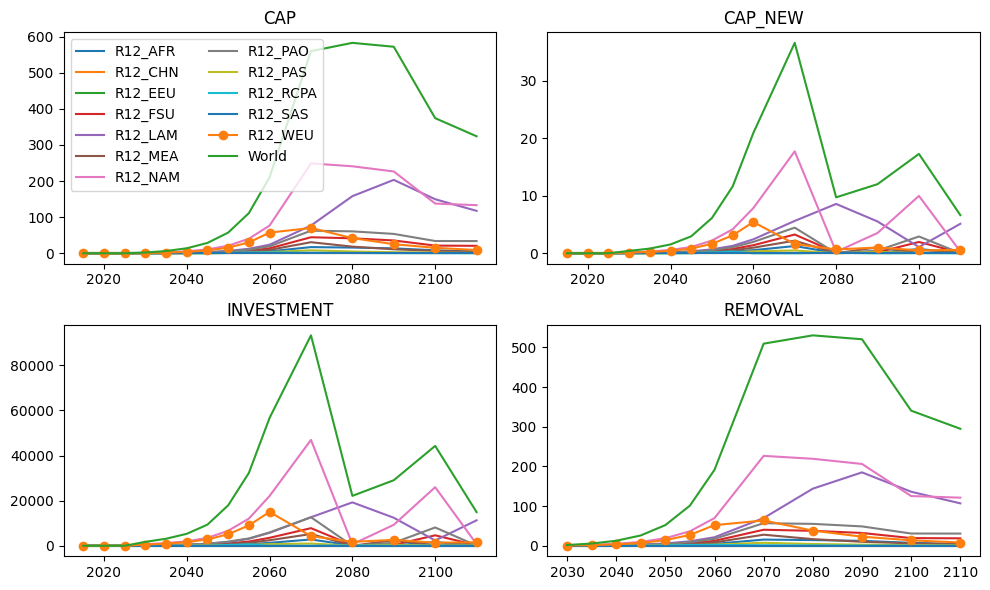

In [2]:
ssp = "SSP2"

mp = ixmp.Platform()

sbase = message_ix.Scenario(mp, model=f"SSP_{ssp}_v1.0",
                            scenario="baseline")

s2run = sbase.clone(
    f"SSP_{ssp}_v1.0",
    "yoga_test_600f",
    keep_solution=False,
)
s2run.check_out()

# add emission bound
s2run.add_par('bound_emission', ['World', 'TCE', 'all', 'cumulative'], value=1631, unit="tC")
    
s2run.commit(comment=f"{ssp}_600f all ssp param")

s2run.solve(solve_options={'scaind': '-1','lpmethod': '4'})
print(ssp, "objective value:", s2run.var("OBJ")["lvl"])

# Get Report
print("stor scenario:", ssp)
scenariotec = ['dac_lt','dac_hte','dac_htg',]
scenario_report = get_report(s2run,scenariotec)

s2run.set_as_default()        

# CLOSE CONNECTION
mp.close_db()


In [3]:
ssp = "SSP2"

mp = ixmp.Platform()

sbase = message_ix.Scenario(mp, model=f"SSP_{ssp}_v1.0",
                            scenario="baseline")


In [8]:
sbase.par('bound_activity_up',{"technology":"co2_storcumulative","year_act":"2100"})

,node_loc,technology,year_act,mode,time,value,unit
0,R12_AFR,co2_storcumulative,2100,all,year,30699.6110,???
1,R12_EEU,co2_storcumulative,2100,all,year,904.1850,???
2,R12_LAM,co2_storcumulative,2100,all,year,27934.4940,???
3,R12_MEA,co2_storcumulative,2100,all,year,28684.5855,???
4,R12_NAM,co2_storcumulative,2100,all,year,29491.9905,???
5,R12_SAS,co2_storcumulative,2100,all,year,2382.6095,???
6,R12_WEU,co2_storcumulative,2100,all,year,5896.6790,???
7,R12_FSU,co2_storcumulative,2100,all,year,41655.3305,???
8,R12_PAO,co2_storcumulative,2100,all,year,17116.9125,???
9,R12_PAS,co2_storcumulative,2100,all,year,10554.2890,???


In [ ]:
ssp = "SSP2"

mp = ixmp.Platform()

sbase = message_ix.Scenario(mp, model=f"SSP_{ssp}_v1.0",
                            scenario="baseline")

s2run = sbase.clone(
    f"SSP_{ssp}_v1.0",
    "yoga_test_600f",
    keep_solution=False,
)
s2run.check_out()

# add emission bound
s2run.add_par('bound_emission', ['World', 'TCE', 'all', 'cumulative'], value=1631, unit="tC")
    
s2run.commit(comment=f"{ssp}_600f all ssp param")

s2run.solve(solve_options={'scaind': '-1','lpmethod': '4'})
print(ssp, "objective value:", s2run.var("OBJ")["lvl"])

s2run.set_as_default()        

# CLOSE CONNECTION
mp.close_db()
